## The Problem
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Dataset can be downloaded from : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## The Solution 

The price of the house is decided on a variety of factors raning from area of the house to SaleCondition type etc. 
So I have tried 2 approaches 1st using the sklearn technique and later on using H20.
When faced with so many parameters it turns difficult to analyse them by plotting graphs for all of them.


In [3]:
import pandas as pd
import numpy as np 
df = pd.read_csv('train.csv')

## Understanding the Data

All the parameters in the dataset are listed below. Out of the given parameters only some are useful i.e the parameters with numerical values are the only ones which can be used for further data analysis


SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
 
MSSubClass: The building class



LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet


Utilities: Type of utilities available


Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling


OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date
RoofStyle: Type of roof

RoofMatl: Roof material


Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)


M

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior


Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition


CentralAir: Central air conditioning

Electrical: Electrical system


1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet


BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality


TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating


Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage


GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition


PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet



EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality


Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold



YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale




## The Dataset




In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#Total no. of factors used to determine the price of a house
len(df.columns)

81

## Data Analysis

MSsubclass ie the class of building with highest prices is 60 , most no. of building fall in category 20 or 60 

MSZoning : RL has the highest prices and is most dense whereas RH and C have least values

Street : type of road access has a clear distinction as the ones with Pave are more common and costier than gravel but the trend
is same in alley as costlier houses have a Pave 

Houses with central air are more in no. and have higher SalesPrice

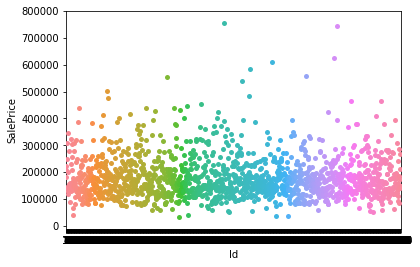

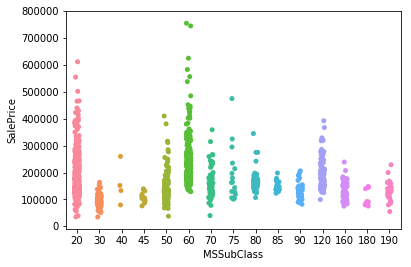

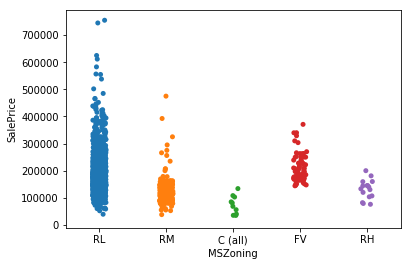

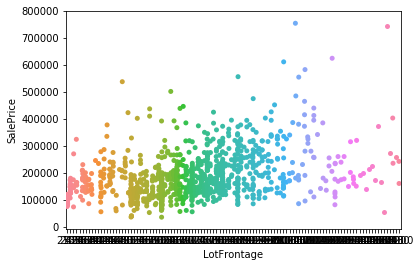

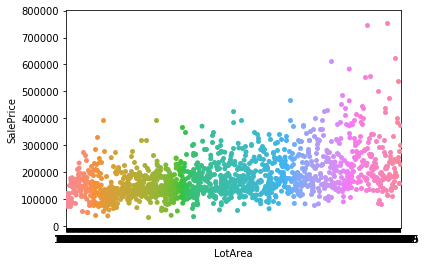

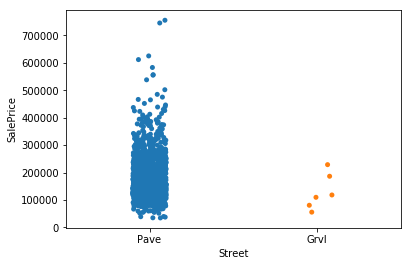

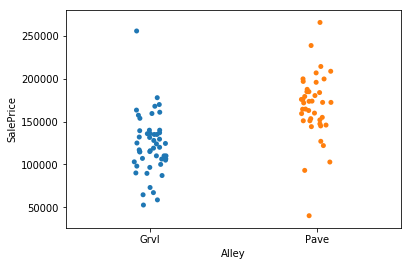

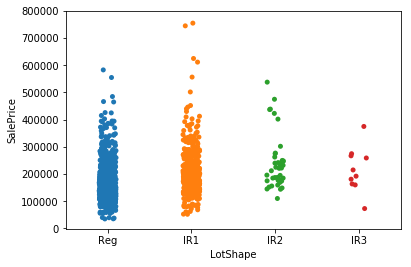

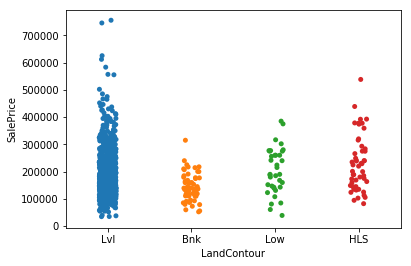

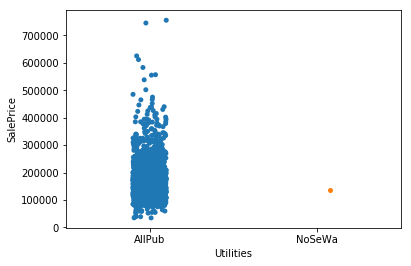

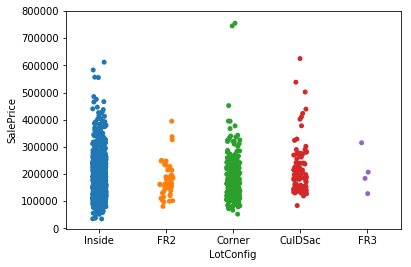

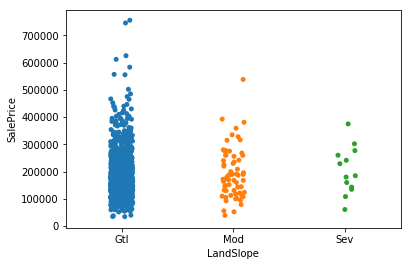

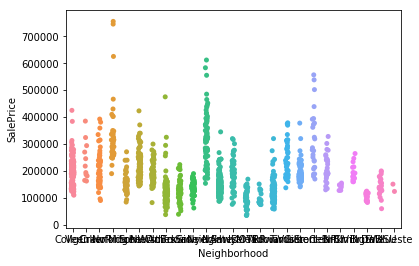

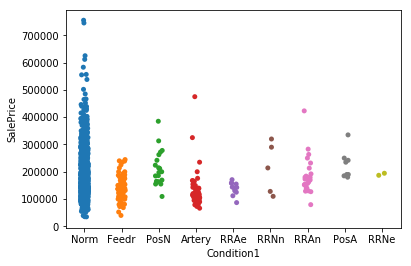

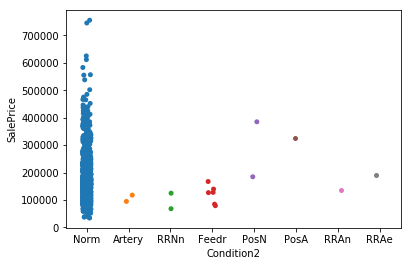

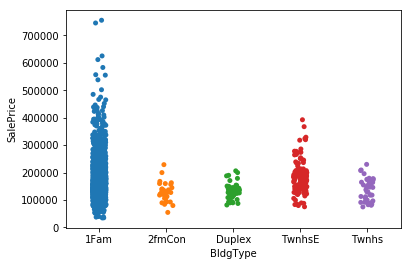

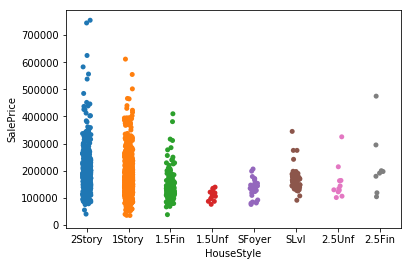

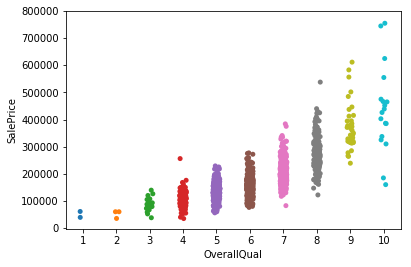

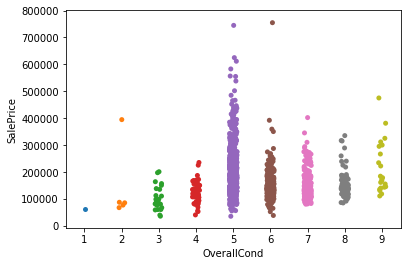

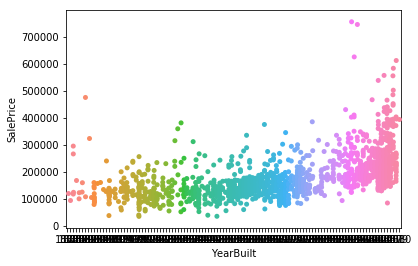

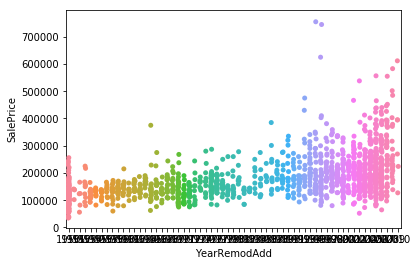

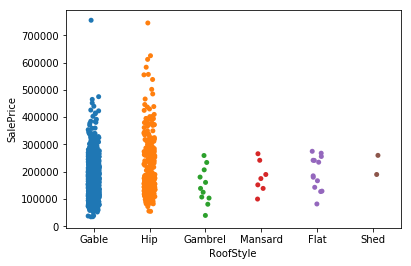

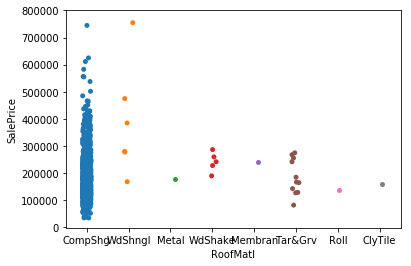

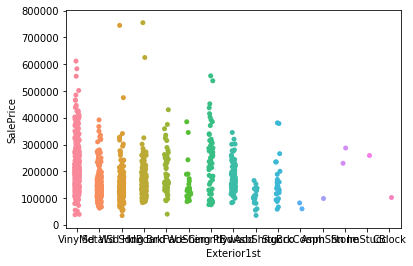

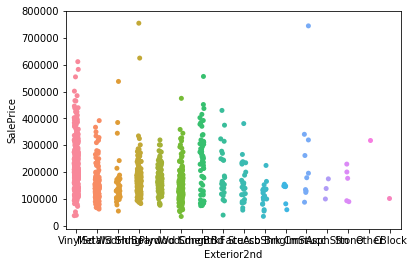

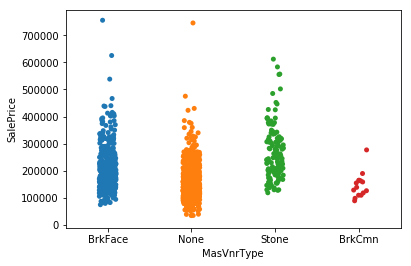

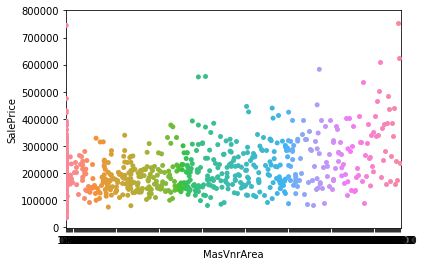

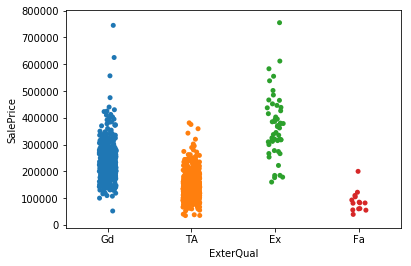

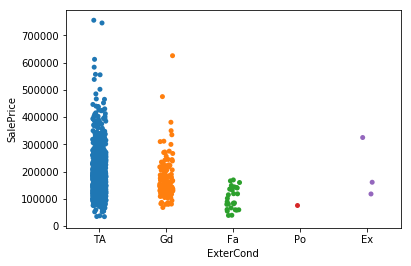

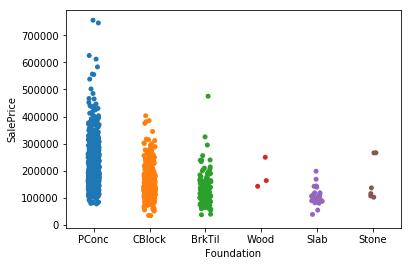

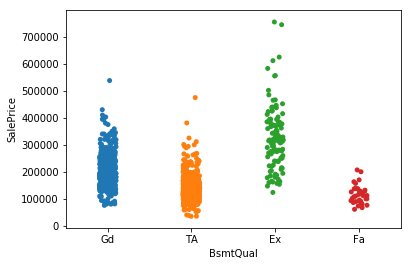

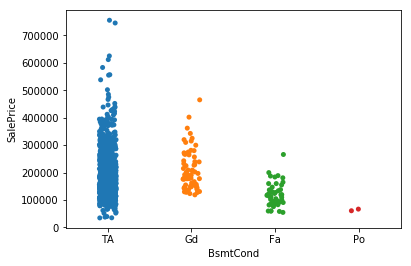

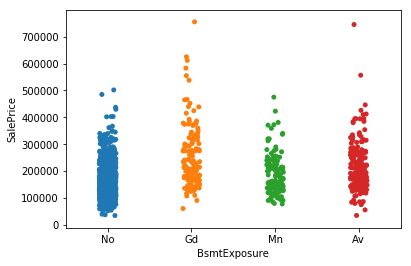

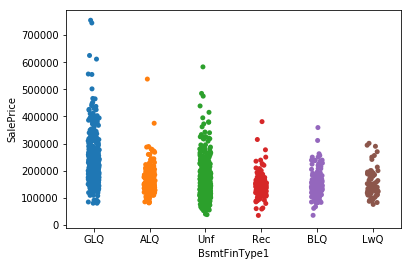

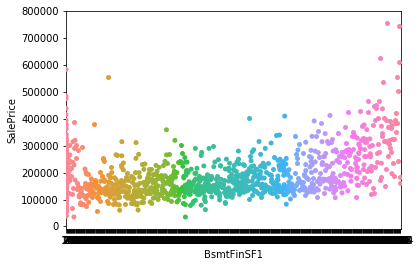

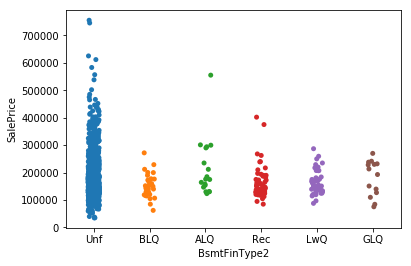

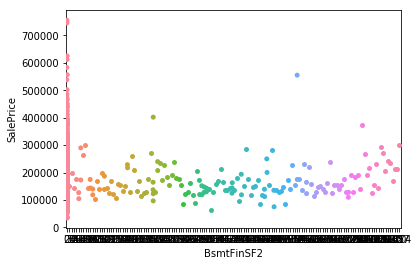

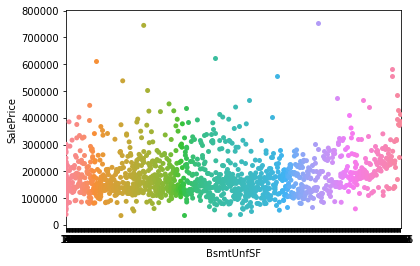

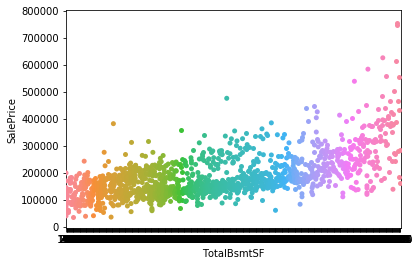

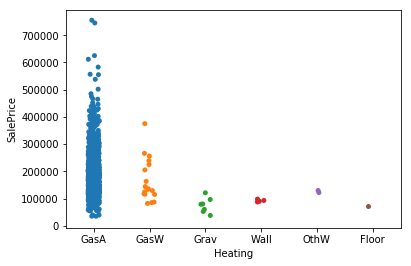

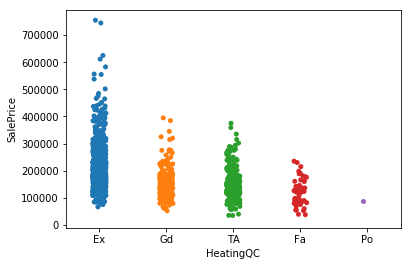

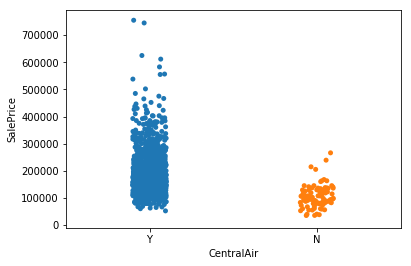

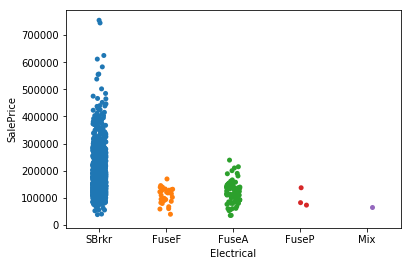

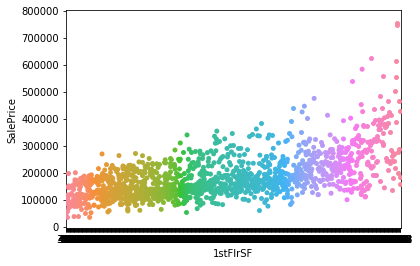

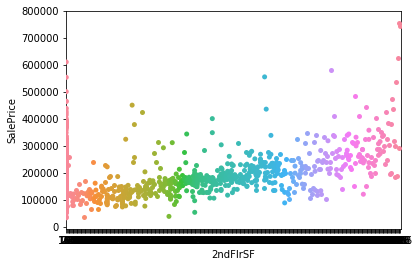

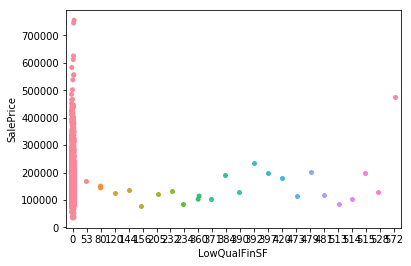

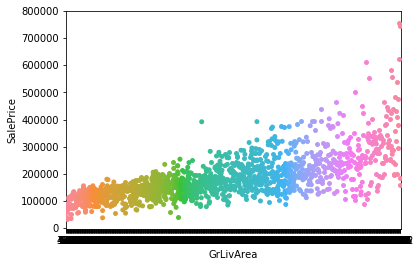

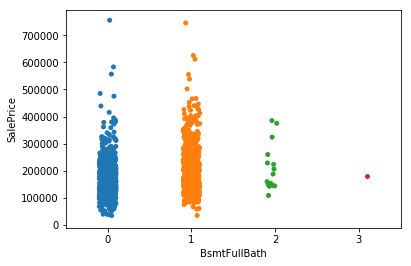

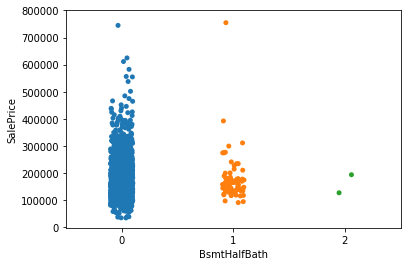

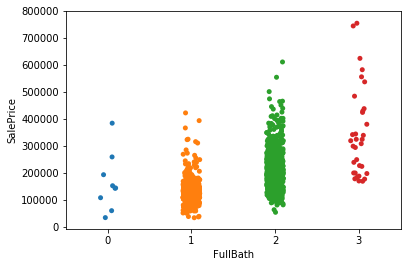

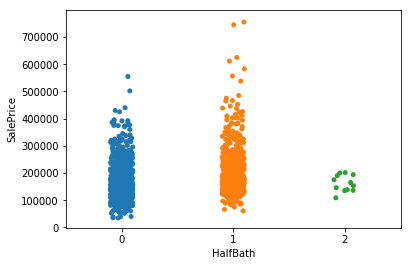

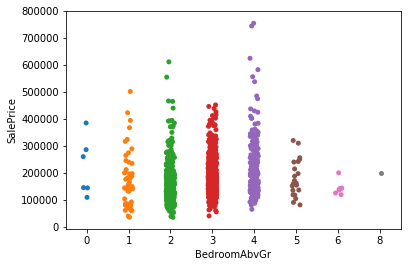

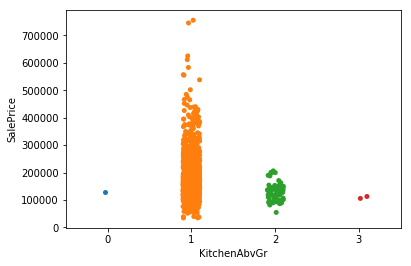

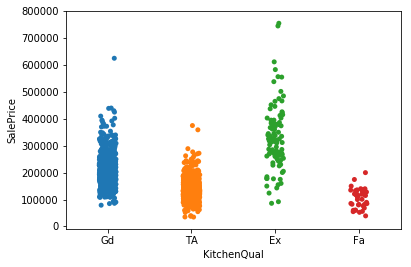

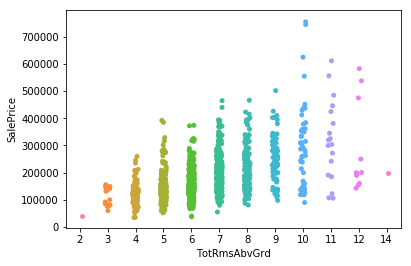

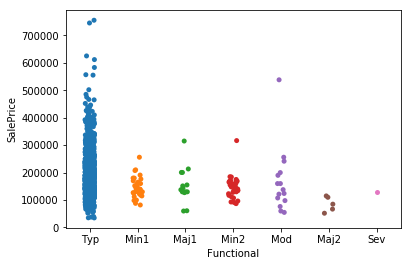

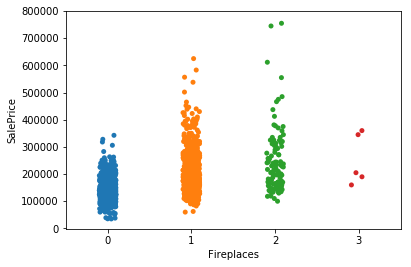

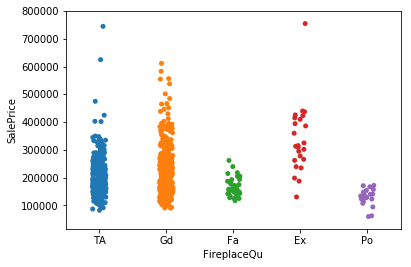

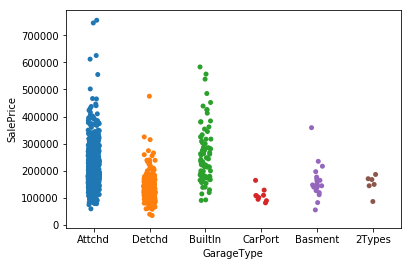

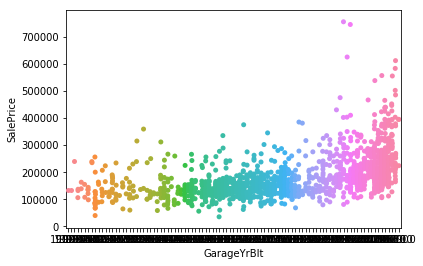

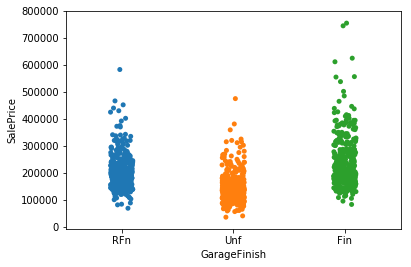

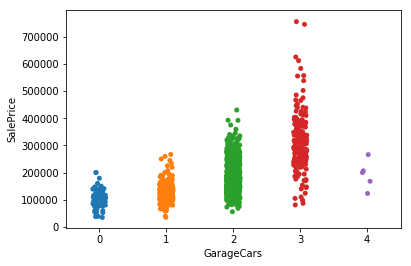

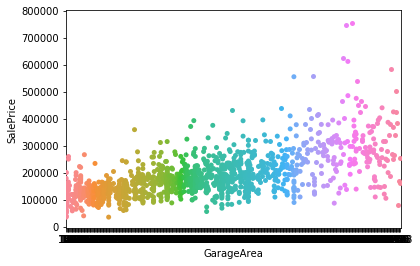

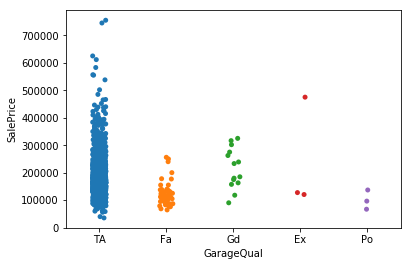

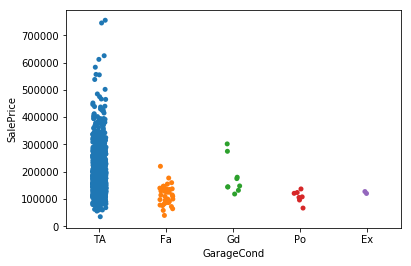

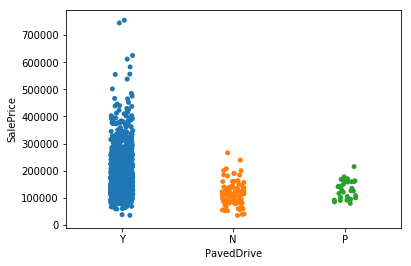

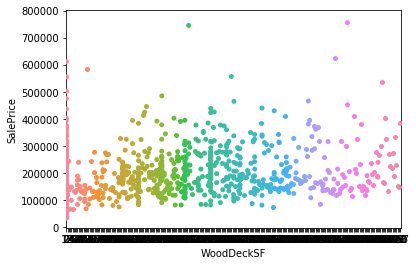

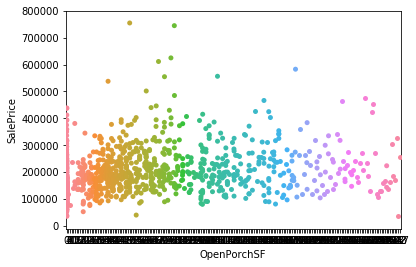

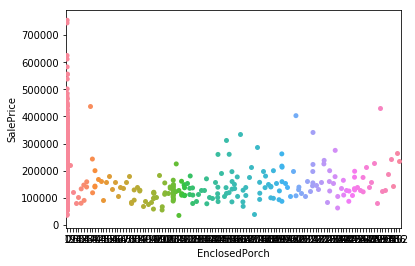

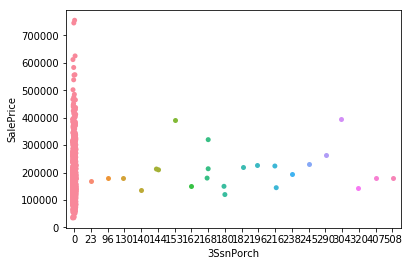

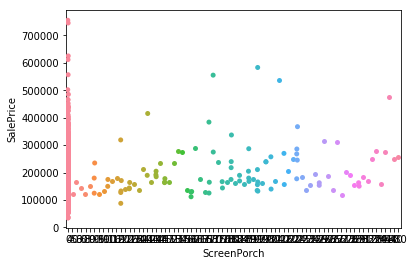

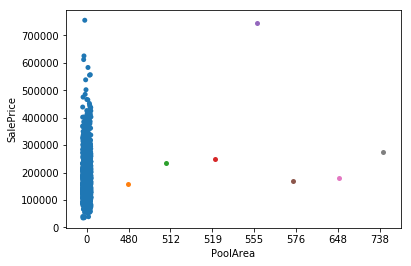

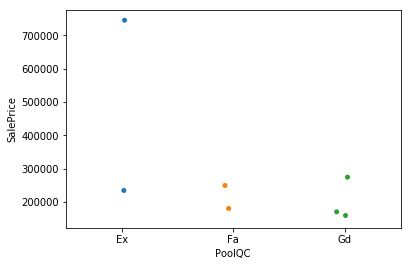

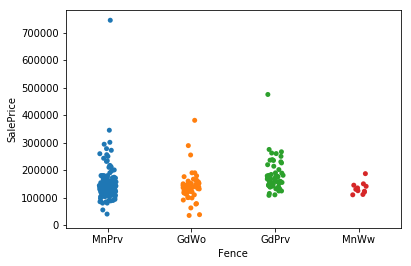

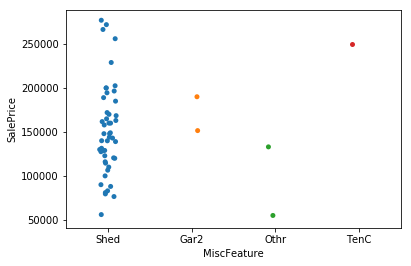

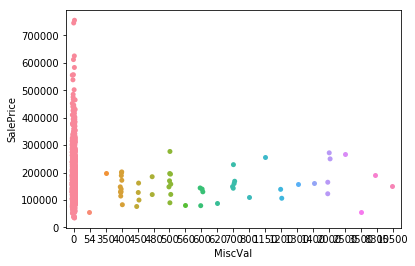

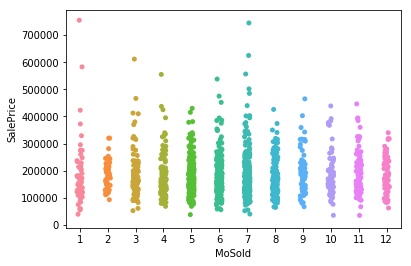

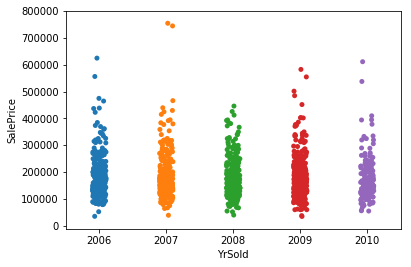

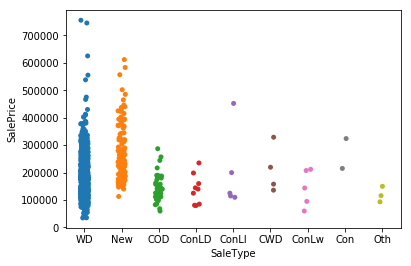

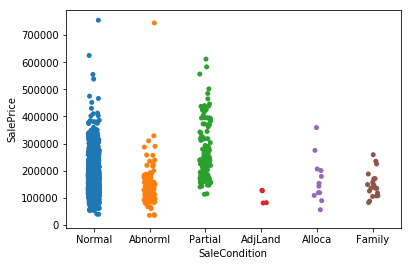

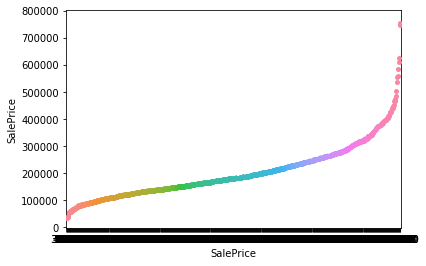

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.columns:
 sns.stripplot(x=i, y="SalePrice", data=df, jitter=True);
 plt.show()

In [58]:
df.fillna(0,inplace=True)
df2 = df[df.columns[df.dtypes != object]]
x_hand  = df2.drop('SalePrice' , axis =1)
y_hand = df['SalePrice']
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_hand, y_hand,test_size=0.1,
                                                random_state=1)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier()
model.fit(x_hand, y_hand)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score,auc
accuracy_score(ytest, y_model)


1.0

In [6]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from c:\users\drsandeepabrol\appdata\local\programs\python\python36\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\DRSAND~1\AppData\Local\Temp\tmpx8ye1d4v
  JVM stdout: C:\Users\DRSAND~1\AppData\Local\Temp\tmpx8ye1d4v\h2o_drsandeepabrol_started_from_python.out
  JVM stderr: C:\Users\DRSAND~1\AppData\Local\Temp\tmpx8ye1d4v\h2o_drsandeepabrol_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,1 month and 19 days
H2O cluster name:,H2O_from_python_drsandeepabrol_7ayzl9
H2O cluster total nodes:,1
H2O cluster free memory:,1.757 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [7]:
hf=h2o.H2OFrame(df)

c:\users\drsandeepabrol\appdata\local\programs\python\python36\lib\site-packages\h2o\utils\shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
from h2o.automl import H2OAutoML
x=hf.columns
y='SalePrice'
hf['SalePrice']=hf['SalePrice'].asfactor()
for r in ['Id',y]:
    x.remove(r)
    
aml = H2OAutoML(max_runtime_secs = 60)
aml.train(x = x, y = y,
          training_frame = hf)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
aml.leaderboard

In [15]:
test=h2o.H2OFrame(pd.read_csv('test.csv'))
preds=aml.predict(test)
final=test.cbind(preds)
results=h2o.as_list(final)

c:\users\drsandeepabrol\appdata\local\programs\python\python36\lib\site-packages\h2o\utils\shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


c:\users\drsandeepabrol\appdata\local\programs\python\python36\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'MSZoning' has levels not trained on: [nan]
  warnings.warn(w)
c:\users\drsandeepabrol\appdata\local\programs\python\python36\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'Utilities' has levels not trained on: [nan]
  warnings.warn(w)
c:\users\drsandeepabrol\appdata\local\programs\python\python36\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'Exterior1st' has levels not trained on: [nan]
  warnings.warn(w)
c:\users\drsandeepabrol\appdata\local\programs\python\python36\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'Exterior2nd' has levels not trained on: [nan]
  warnings.warn(w)
c:\users\drsandeepabrol\appdata\local\programs\python\python36\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'KitchenQual' has levels not trained on: 